In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [227]:
forest_data = pd.read_csv('forestfires.csv')

In [228]:
forest_data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small


In [229]:
forest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [230]:
forest_data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,0.143133,0.162476,0.183752,0.117988,0.123791,0.104449,0.017408,0.355899,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,0.350548,0.369244,0.387657,0.322907,0.329662,0.306138,0.130913,0.479249,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [231]:
forest_data.nunique()

month             12
day                7
FFMC             106
DMC              215
DC               219
ISI              119
temp             192
RH                75
wind              21
rain               7
area             251
dayfri             2
daymon             2
daysat             2
daysun             2
daythu             2
daytue             2
daywed             2
monthapr           2
monthaug           2
monthdec           2
monthfeb           2
monthjan           2
monthjul           2
monthjun           2
monthmar           2
monthmay           2
monthnov           2
monthoct           2
monthsep           2
size_category      2
dtype: int64

<Axes: xlabel='month', ylabel='Count'>

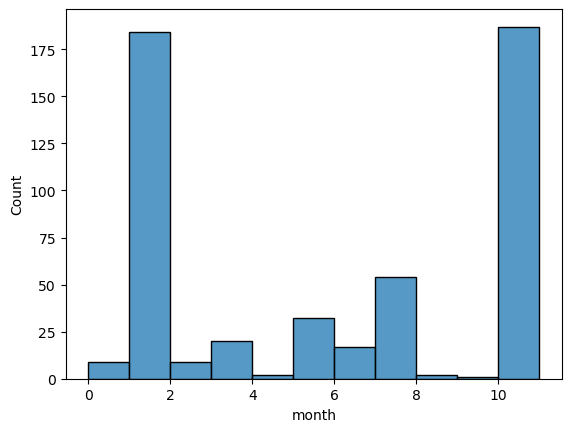

In [261]:
sns.histplot(forest_data['month'])


<Axes: xlabel='day', ylabel='Count'>

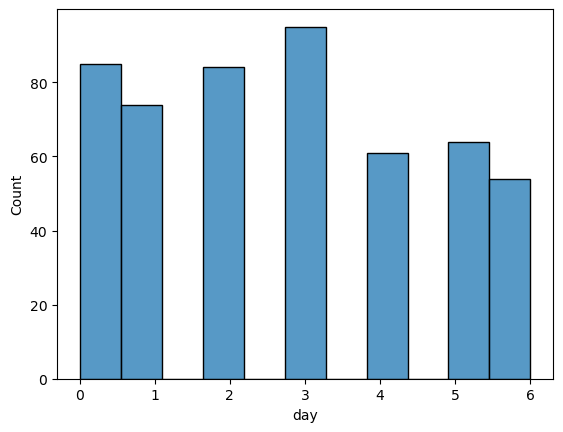

In [262]:

sns.histplot(forest_data['day'])


<Axes: xlabel='FFMC', ylabel='Count'>

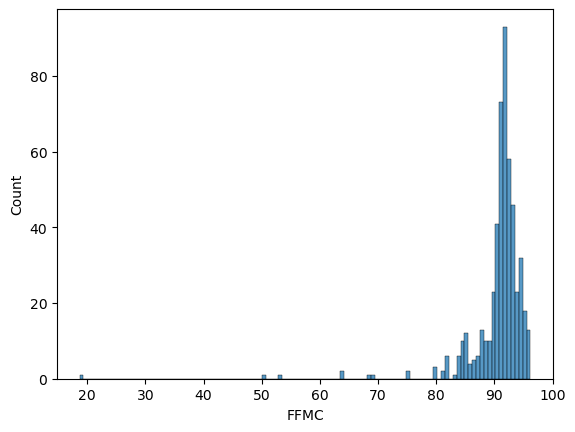

In [263]:

sns.histplot(forest_data['FFMC'])


<Axes: xlabel='DMC', ylabel='Count'>

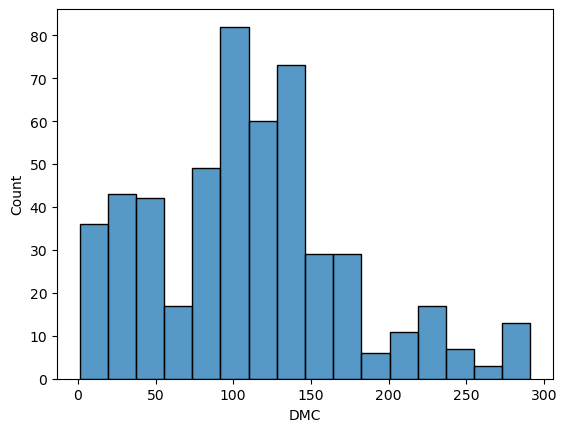

In [264]:

sns.histplot(forest_data['DMC'])


<Axes: xlabel='DC', ylabel='Count'>

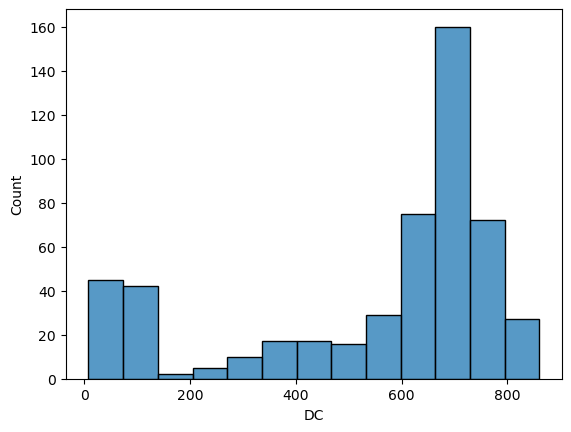

In [265]:

sns.histplot(forest_data['DC'])


<Axes: xlabel='ISI', ylabel='Count'>

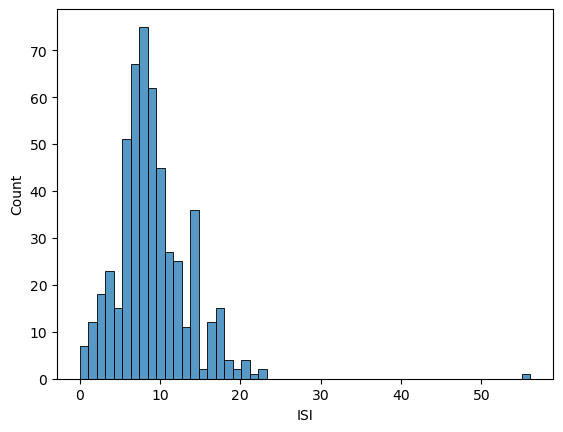

In [266]:

sns.histplot(forest_data['ISI'])


<Axes: xlabel='temp', ylabel='Count'>

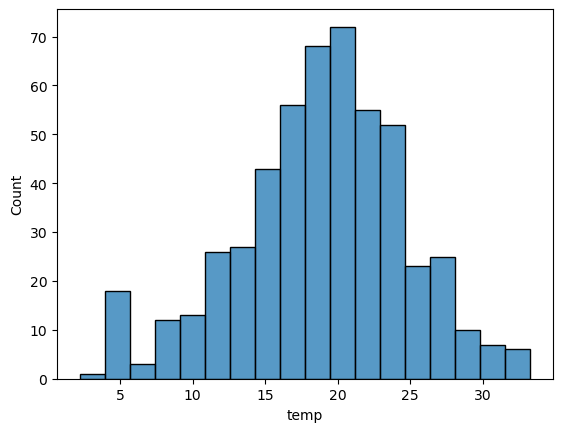

In [267]:

sns.histplot(forest_data['temp'])


<Axes: xlabel='rain', ylabel='Count'>

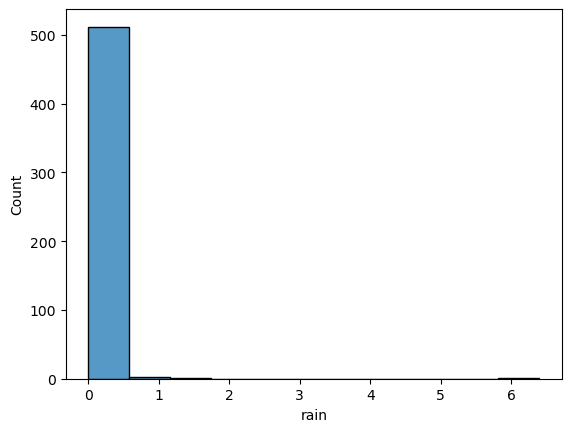

In [268]:

sns.histplot(forest_data['rain'])


<Axes: xlabel='RH', ylabel='Count'>

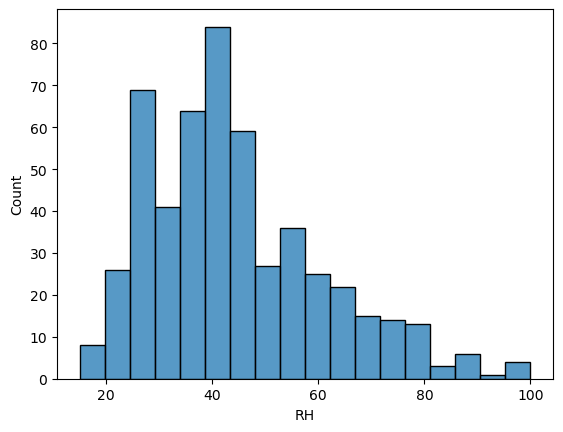

In [269]:

sns.histplot(forest_data['RH'])


<Axes: xlabel='wind', ylabel='Count'>

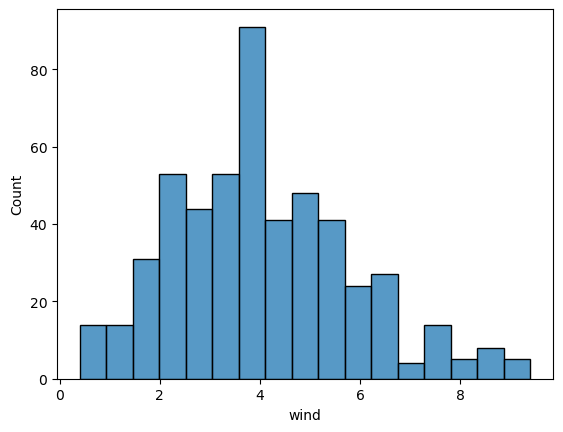

In [270]:

sns.histplot(forest_data['wind'])


<Axes: xlabel='area', ylabel='Count'>

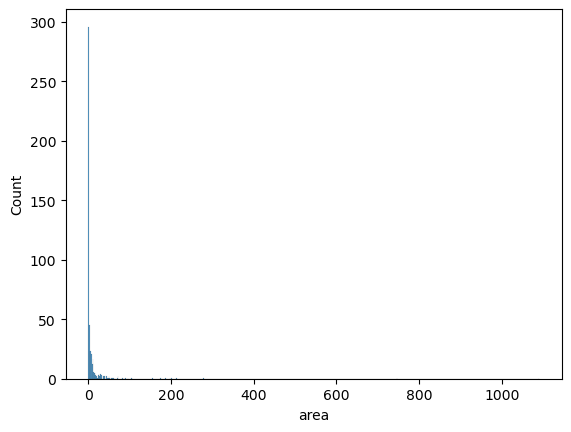

In [272]:

sns.histplot(forest_data['area'])


<Axes: xlabel='size_category', ylabel='Count'>

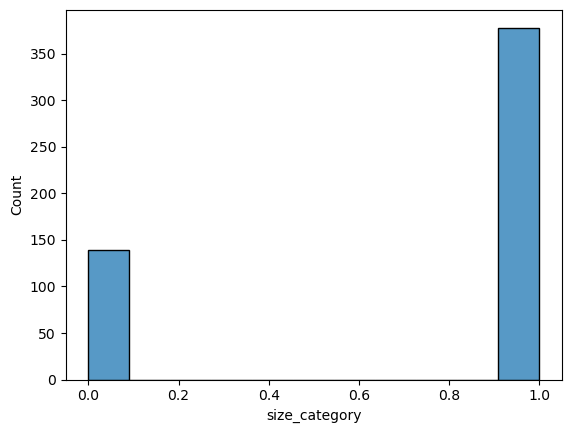

In [273]:

sns.histplot(forest_data['size_category'])

# Encoding the categorical data

In [232]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [233]:
forest_data['month'] = le.fit_transform(forest_data['month'])
forest_data['day'] = le.fit_transform(forest_data['day'])
forest_data['size_category'] = le.fit_transform(forest_data['size_category'])

In [234]:
from  sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [235]:

pd.set_option('display.max_columns', 500)
forest_data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [236]:
forest_data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [237]:
columns_to_drop = ['dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep']
forest_data.drop(columns=columns_to_drop, axis=1, inplace=True)

In [238]:
forest_data.corr()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
month,1.000000,-0.150982,-0.007636,-0.173152,0.219439,-0.172087,-0.073802,-0.102057,-0.141131,-0.076800,0.031054,-0.032559
day,-0.150982,1.000000,0.074914,0.070218,0.058737,0.117738,0.148672,-0.103389,-0.034504,0.052881,0.018916,-0.003550
FFMC,-0.007636,0.074914,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122,-0.022063
DMC,-0.173152,0.070218,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994,-0.034715
DC,0.219439,0.058737,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383,-0.019428
ISI,-0.172087,0.117738,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258,0.008726
temp,-0.073802,0.148672,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844,-0.006021
RH,-0.102057,-0.103389,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519,0.045243
wind,-0.141131,-0.034504,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317,-0.059113
rain,-0.076800,0.052881,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366,-0.050001


<Axes: >

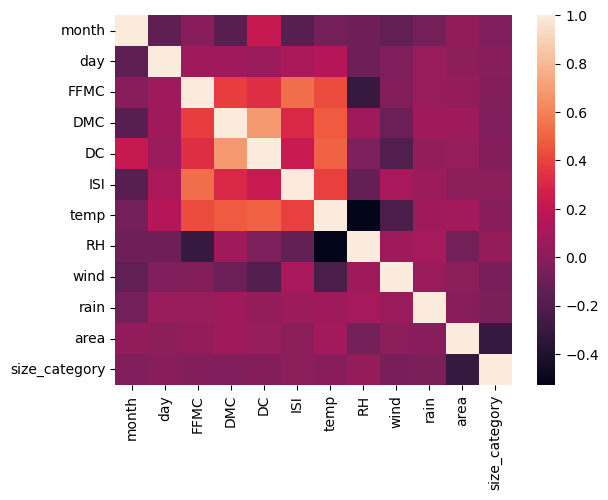

In [255]:
sns.heatmap(forest_data.corr())

In [258]:
forest_data.isnull().sum()
#No null values

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
size_category    0
dtype: int64

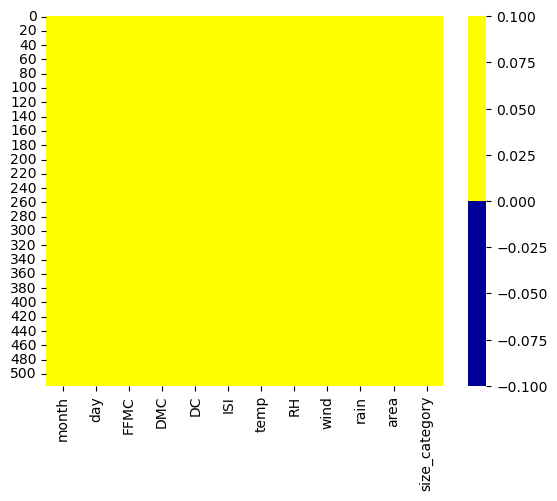

In [259]:
colours = ['#000099', '#ffff00'] 
pal = sns.color_palette(colours)
sns.heatmap(forest_data.isnull(), cmap=pal)
plt.show()

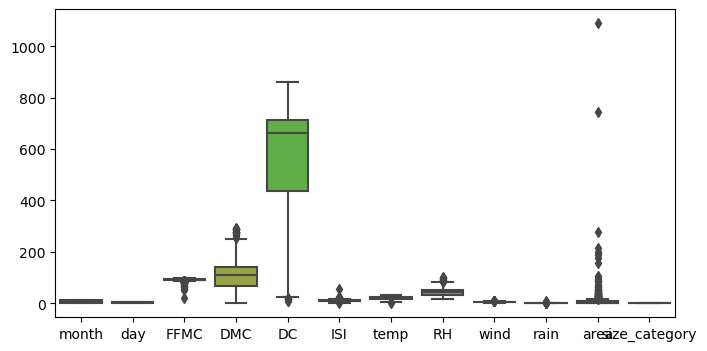

In [260]:
plt.figure(figsize=(8,4))
box = sns.boxplot(data = forest_data)
plt.show()

In [239]:
X = forest_data.iloc[:,:-1]
Y = forest_data['size_category']
X

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


# Scaling the continuous data

In [240]:
# Note : Fit.tranform should be done only on Feature_training data and .transform should be done on feature_test data
# fit.transform on both training and testing data can led to data leakage
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
X_train_SC = sc.fit_transform(X_train)

X_test_SC = sc.transform(X_test)


In [241]:
X_train_SC

array([[ 1.17005658, -0.37741568,  0.28028558, ...,  0.00163124,
        -0.06781709, -0.17108721],
       [ 1.17005658, -0.9022395 ,  0.06165224, ..., -1.00892252,
        -0.06781709, -0.17678856],
       [-1.12340981,  1.19705578,  0.26346763, ...,  0.00163124,
        -0.06781709, -0.17634999],
       ...,
       [-1.12340981,  1.19705578,  0.26346763, ..., -0.50364564,
        -0.06781709, -0.23270564],
       [-0.20602325, -0.37741568,  0.04483429, ..., -1.23349003,
        -0.06781709, -0.24410834],
       [-1.12340981,  1.19705578,  0.71755226, ...,  0.00163124,
        -0.06781709, -0.24410834]])

In [242]:
X_test_SC

array([[ 0.48201667, -0.37741568, -0.91378881, ...,  0.50690812,
        -0.06781709, -0.24410834],
       [-1.12340981,  1.19705578,  0.93618559, ...,  0.50690812,
         2.42182367, -0.24410834],
       [-1.12340981, -0.9022395 ,  0.26346763, ..., -1.23349003,
        -0.06781709, -0.21713657],
       ...,
       [-1.12340981, -1.42706332,  0.07847019, ...,  2.02273877,
         4.28905425, -0.196524  ],
       [-1.12340981,  0.14740814, -1.50241703, ...,  1.012185  ,
        -0.06781709,  0.9463773 ],
       [ 1.17005658,  0.67223196,  0.38119327, ...,  1.79817126,
        -0.06781709,  0.50934693]])

In [243]:
y_train.value_counts(),y_test.value_counts()

(1    302
 0    111
 Name: size_category, dtype: int64,
 1    76
 0    28
 Name: size_category, dtype: int64)

In [244]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Linear SVM

In [245]:
model = SVC(kernel='linear')

In [246]:
model.fit(X_train_SC,y_train)

SVC(kernel='linear')

In [247]:
train_pred = model.predict(X_train_SC)
test_pred = model.predict(X_test_SC)

In [248]:
accuracy_score(y_train,train_pred),accuracy_score(y_test,test_pred)

(0.9394673123486683, 0.9519230769230769)

# RBF SVM

In [249]:
model1 = SVC(kernel='rbf')

model1.fit(X_train_SC,y_train)

train_pred1 = model1.predict(X_train_SC)
test_pred1 = model1.predict(X_test_SC)

accuracy_score(y_train,train_pred1),accuracy_score(y_test,test_pred1)



(0.8305084745762712, 0.8269230769230769)

# Poly SVM

In [250]:
model2 = SVC(kernel='poly')

model2.fit(X_train_SC,y_train)

train_pred2 = model2.predict(X_train_SC)
test_pred2 = model2.predict(X_test_SC)

accuracy_score(y_train,train_pred2),accuracy_score(y_test,test_pred2)



(0.801452784503632, 0.8076923076923077)

# Sigmoid SVM

In [251]:
model3 = SVC(kernel='sigmoid')

model3.fit(X_train_SC,y_train)

train_pred3 = model3.predict(X_train_SC)
test_pred3 = model3.predict(X_test_SC)

accuracy_score(y_train,train_pred3),accuracy_score(y_test,test_pred3)



(0.7772397094430993, 0.7884615384615384)

# Hyper parameter tuning

In [252]:
clf = SVC(kernel='linear')
parameters = {'kernel':['linear'],
               'gamma':[100, 75, 50, 45, 22, 5, 0.5, 0.1, 0.01, 0.0001],
               'C':[50, 35, 15, 12, 10, 6, 5, 0.1, 0.001]}


In [253]:
from sklearn.model_selection import GridSearchCV
gsv = GridSearchCV(clf, param_grid = parameters, cv=10)

gsv.fit(X_train_SC, y_train)

GridSearchCV(cv=10, estimator=SVC(kernel='linear'),
             param_grid={'C': [50, 35, 15, 12, 10, 6, 5, 0.1, 0.001],
                         'gamma': [100, 75, 50, 45, 22, 5, 0.5, 0.1, 0.01,
                                   0.0001],
                         'kernel': ['linear']})

In [254]:
gsv.best_score_


0.9855400696864113

In [195]:
gsv.best_params_

{'C': 15, 'gamma': 100, 'kernel': 'linear'}

Best parameters are 'C': 35, 'gamma': 100, 'kernel': 'linear'.

In [210]:
final_model = SVC(kernel='linear',C=50,gamma=100)

In [211]:
final_model.fit(X_train_SC,y_train)

SVC(C=50, gamma=100, kernel='linear')

In [212]:
final_train = final_model.predict(X_train_SC)

In [213]:
 final_test = final_model.predict(X_test_SC)

In [214]:
acc = accuracy_score(y_test, final_test) * 100
print("Accuracy =", acc)

Accuracy = 98.07692307692307


In [215]:
# We got accuracy of 98%

In [216]:
# Confusion matrix of final model
from sklearn.metrics import classification_report,confusion_matrix
confusion_matrix(y_train,final_train)

array([[110,   1],
       [  3, 299]], dtype=int64)

In [217]:
confusion_matrix(y_test,final_test)

array([[27,  1],
       [ 1, 75]], dtype=int64)

# Classification report

In [218]:
print(classification_report(y_test,final_test))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        28
           1       0.99      0.99      0.99        76

    accuracy                           0.98       104
   macro avg       0.98      0.98      0.98       104
weighted avg       0.98      0.98      0.98       104

